In [1]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# 读取wav文件，得到采样率和数据

# sample_rate, data = read('C:\\Users\\88486\\Desktop\\WorkSpace\\Python\\通信原理\\suno.wav') #windows路径

sample_rate, data = read('suno.wav') #linux路径

print(sample_rate,data)
data_left=data[:0]
data_right=data[:1]
plt.figure("左声道原始信号")
plt.plot(np.arange(len(data)),)
plt.figure("左声道原始信号")
# 创建载波信号
time = np.arange(len(data))/float(sample_rate)#载波时间
carrier_freq=sample_rate*2#载波频率


48000 [[-30 -37]
 [-42 -50]
 [-35 -42]
 ...
 [-31 -40]
 [-37 -46]
 [-30 -37]]


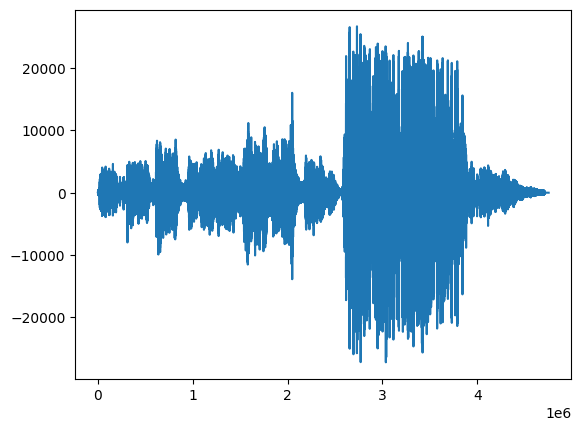

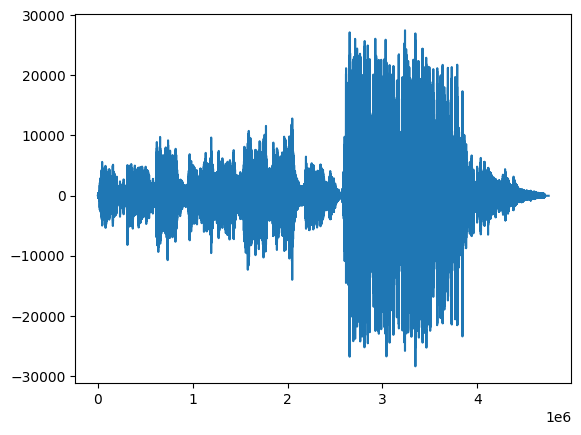

In [6]:
carrier = np.cos(2.0 * np.pi * carrier_freq * time)#产生载波信号
modulated_data = np.empty_like(data)
modulated_left=modulated_data[:, 0] = carrier * data[:, 0]#左声道调制
modulated_right=modulated_data[:, 1] = carrier * data[:, 1]#右声道调制
plt.figure("左声道AM波调制信号")
plt.plot(np.arange(len(modulated_left)),modulated_left)
plt.figure("右声道AM波调制信号")
plt.plot(np.arange(len(modulated_right)),modulated_right)
plt.show()


max(cha[:,0]):2
max(cha[:,1]):2
max(data[:,0]):26626
max(data[:,1]):27485
max(demodulated_data[:,0]):26626
max(demodulated_data[:,1]):27485
左声道解调成功
右声道解调成功


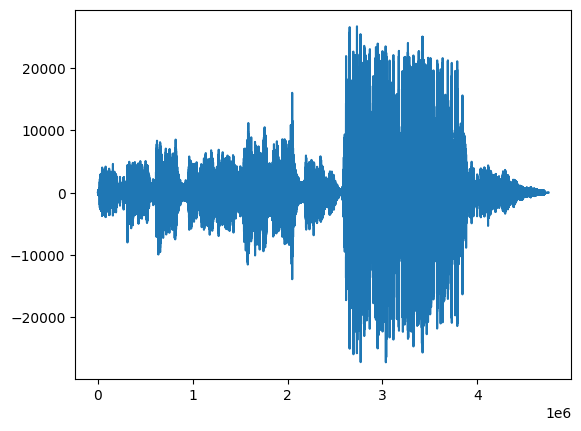

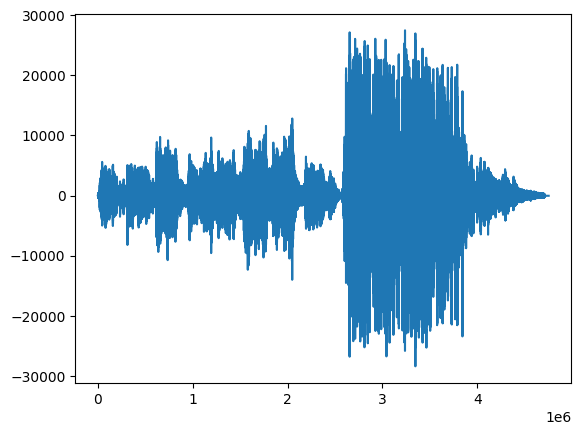

In [7]:
# 接下来对AM信号进行解调
# 生成解调信号
demodulated_data = np.empty_like(modulated_data)
demodulated_data[:, 0] = modulated_data[:, 0] * carrier#左声道解调
demodulated_data[:, 1] = modulated_data[:, 1] * carrier#右声道解调
# plt.figure()
# plt.plot(demodulated_data)
# if(demodulated_data==data).all():
#     print("解调成功")
# else:
#     print("解调失败")


#判断是否解调成功
cha=demodulated_data-data
print("max(cha[:,0]):{}".format(max(cha[:,0])))
print(f"max(cha[:,1]):{max(cha[:,1])}")
print(f"max(data[:,0]):{max(data[:,0])}")
print(f"max(data[:,1]):{max(data[:,1])}")
print(f"max(demodulated_data[:,0]):{max(demodulated_data[:,0])}")
print(f"max(demodulated_data[:,1]):{max(demodulated_data[:,1])}")
if(max(cha[0])//max(data[:,0])<0.001):
    print("左声道解调成功")
else:
    print("左声道解调失败")

if(max(cha[1])//max(data[:,1])<0.001):
    print("右声道解调成功")
else:
    print("右声道解调失败")

# 绘制解调信号
plt.figure("左声道AM波x调制信号")
plt.plot(np.arange(len(demodulated_data[:, 0])),demodulated_data[:, 0])
plt.figure("右声道AM波x调制信号")
plt.plot(np.arange(len(demodulated_data[:, 1])),demodulated_data[:, 1])

# for i in range(0,len(data)):
# print(cha)
# sum_left=sum_right=0
# for i in range(0,len(cha)):
#     if cha[i][0]!=0:
#         sum_left+=1
#     if cha[i][1]!=0:
#         sum_right+=1
# print(f"sum_left:{sum_left}")
# print(f"sum_right:{sum_right}")

# if(demodulated_data[:,0]==data[:,0]).all():
#     print("左声道解调成功")
# else:
#     print("左声道解调失败")
# if(demodulated_data[:,1]==data[:,1]).all():
#     print("右声道解调成功")
# else:
#     print("右声道解调失败")

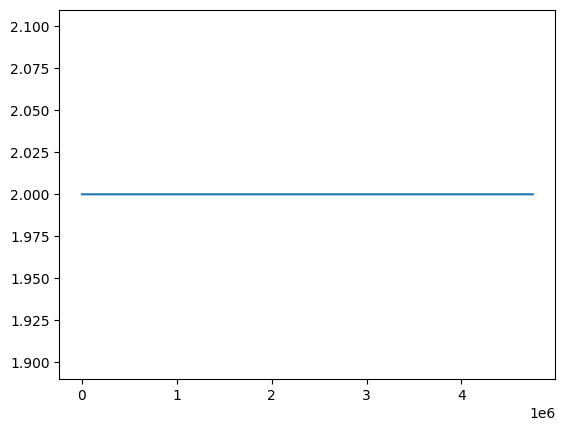

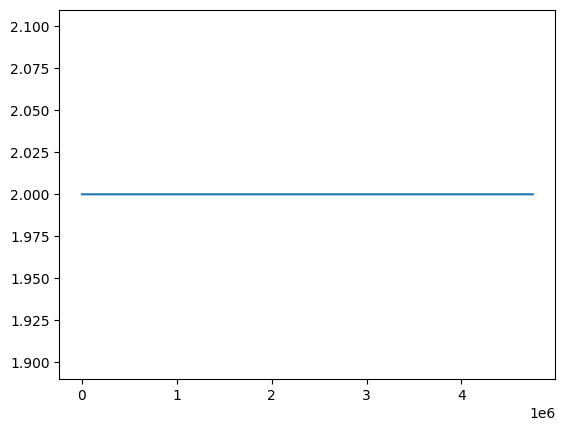

In [5]:
# 对AM信号进行DSB调制
# 分别对左右声道分别做DSB调制
'''
upper_sideband_left：这是在计算上部边带的信号。在双边带调制中，上部边带是在载波频率上加上信号频率后的结果。这是通过计算2*np.pi*(carrier_freq+carrier_freq)*time的余弦值来实现的，其中carrier_freq是载波频率，time是时间。
lower_sideband_left：这是在计算下部边带的信号。在双边带调制中，下部边带就是将载波频率减去信号频率的结果。这是通过计算2*np.pi*(carrier_freq-carrier_freq)*time的余弦值来实现的。
dsb_wave：最后，dsb_wave是上部边带的信号和下部边带信号的叠加，这就形成了双边带调制的波形。
'''
upper_sideband_left = np.cos(2*np.pi*(carrier_freq+carrier_freq)*time)
lower_sideband_left = np.cos(2*np.pi*(carrier_freq-carrier_freq)*time)
dsb_wave_left = upper_sideband_left + lower_sideband_left
plt.figure("左声道DSB信号")
plt.plot(np.arange(len(modulated_left)),dsb_wave_left)
# plt.show()
upper_sideband_right = np.cos(2*np.pi*(carrier_freq+carrier_freq)*time)
lower_sideband_right = np.cos(2*np.pi*(carrier_freq-carrier_freq)*time)
dsb_wave_right = upper_sideband_right + lower_sideband_right
# dsb_modulated_data = np.empty_like(data)
plt.figure("右声道DSB信号")
plt.plot(np.arange(len(modulated_right)),dsb_wave_right)
# plt.show()

In [17]:
print(len(data))

4752000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
sample_rate = 1000 # 采样率
carrier_freq = 50 # 载波频率
time = np.arange(0, 1, 1/sample_rate) # 时间数组

# 生成载波信号
carrier = np.cos(2 * np.pi * carrier_freq * time)

# 绘制载波信号
plt.figure()
plt.plot(time, carrier)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier signal')
plt.grid(True)
plt.show()